Modules

In [51]:
from linear_regression import linear_regression as ln
from params import params
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib

In [52]:
def model(x, theta):
	return x.dot(theta)

def cost(x, y, theta):
	m = len(y)
	return (np.sum((model(x, theta) - y) ** 2)) / (2 * m)

def gradient(x, y, theta):
	m = len(y)
	return 1/m * x.T.dot(model(x, theta) - y)
	# return x.T.dot((model(x, theta) - y)) / (1 / m)

def gradient_descent(x, y, theta, lr, turns):
	for i in range(0, turns):
		theta = theta - lr * gradient(x, y, theta)
	return theta


Dataset

In [53]:
df = ln.retrieve_dataset(params.path)

In [54]:
# Isolating targets and feature into mx
feature = df[:, 0] # km 
target = df[:, 1] # price

In [55]:
# Normalizing shapes
x = feature.reshape(feature.shape[0], 1)
y = target.reshape(target.shape[0], 1)
nx = np.zeros(len(x), dtype=float).reshape(-1, 1)

In [56]:
# Normalizing values between 0 and 1
xmin = np.min(x)
xmax = np.max(x)
for i in range(len(x)):
	nx[i] = (x[i] - xmin) / (xmax - xmin)

In [57]:
# Adding bias column to X
X = np.hstack((nx, np.ones(nx.shape)))

In [58]:
# Creating theta vector from random values
theta = np.random.randn(2, 1)

In [59]:
# Defining theta
theta_fin = ln.gradient_descent(X, y, theta, lr=0.5, turns=300)
predictions = ln.model(X, theta_fin)


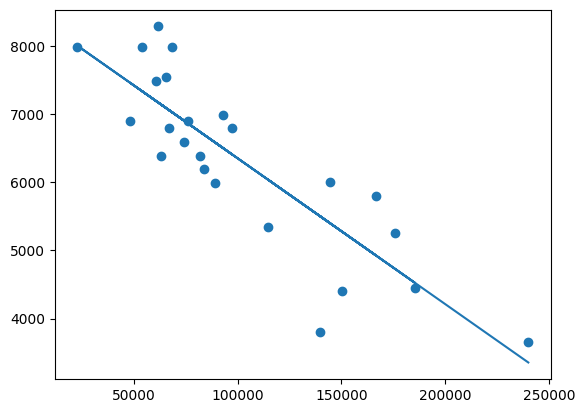

In [60]:
# Plotting
plt.scatter(feature, y)
plt.plot(feature, predictions)